In [2]:
"""
You need to run this cell for the code in following cells to work.
"""

# Enable module reloading
%load_ext autoreload
%autoreload 2

%load_ext tensorboard

import datetime
import os
import sys
sys.path.append('..')

import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
from matplotlib import pyplot


In [141]:
testx = np.genfromtxt('./datasets/dataSet1TestX1.csv', delimiter=',')[1:]
testy = np.genfromtxt('./datasets/dataSet1TestY1.csv', delimiter=',')

trainx = np.genfromtxt('./datasets/dataSet1TrainX1.csv', delimiter=',')[1:]
trainy = np.genfromtxt('./datasets/dataSet1TrainY1.csv', delimiter=',')

In [71]:
testx = np.genfromtxt('./datasets/dataSet1TestX2.csv', delimiter=',')[1:]
testy = np.genfromtxt('./datasets/dataSet1TestY2.csv', delimiter=',')

trainx = np.genfromtxt('./datasets/dataSet1TrainX2.csv', delimiter=',')[1:]
trainy = np.genfromtxt('./datasets/dataSet1TrainY2.csv', delimiter=',')

In [32]:
testx = np.genfromtxt('./datasets/dataSet1TestX.csv', delimiter=',')[1:]
testy = np.genfromtxt('./datasets/dataSet1TestY.csv', delimiter=',')

trainx = np.genfromtxt('./datasets/dataSet1TrainX.csv', delimiter=',')[1:]
trainy = np.genfromtxt('./datasets/dataSet1TrainY.csv', delimiter=',')

In [126]:
testx = np.genfromtxt('./datasets/dataSet2TestX.csv', delimiter=',')[1:]
testy = np.genfromtxt('./datasets/dataSet2TestY.csv', delimiter=',')

trainx = np.genfromtxt('./datasets/dataSet2TrainX.csv', delimiter=',')[1:]
trainy = np.genfromtxt('./datasets/dataSet2TrainY.csv', delimiter=',')

In [3]:
testx = np.genfromtxt('./datasets/dataSet3TestX.csv', delimiter=',')[1:]
testy = np.genfromtxt('./datasets/dataSet3TestY.csv', delimiter=',')

trainx = np.genfromtxt('./datasets/dataSet3TrainX.csv', delimiter=',')[1:]
trainy = np.genfromtxt('./datasets/dataSet3TrainY.csv', delimiter=',')

In [132]:
trainx = trainx[:3]
trainy = trainy[:3]
testx = testx[:3]
testy = testy[:3]

In [4]:
trainx

array([[0. , 2. , 0. , ..., 2.2, 6. , 5. ],
       [1. , 2. , 1. , ..., 3.7, 6. , 4. ],
       [0. , 1. , 0. , ..., 3. , 6. , 5. ],
       ...,
       [3. , 0. , 1. , ..., 2.6, 7. , 6. ],
       [6. , 5. , 1. , ..., 2.9, 6. , 7. ],
       [3. , 0. , 1. , ..., 2.5, 7. , 6. ]])

In [140]:
trainx.shape

(8491, 32)

In [122]:
trainy.shape

(8491,)

In [5]:
model = tf.keras.Sequential()
model.add(keras.layers.Embedding(input_dim=64, output_dim=1))

model.add(keras.layers.GRU(32))

model.add(keras.layers.Dense(16, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=keras.optimizers.SGD(lr=0.01),
              metrics=['sparse_categorical_accuracy'])

history = model.fit(trainx, trainy,
          validation_data=(testx, testy),
          batch_size=100,
          epochs=30)





Train on 8491 samples, validate on 1358 samples
Epoch 1/30
8491/8491 [==============================] - 5s 561us/sample - loss: 2.7029 - sparse_categorical_accuracy: 0.2447 - val_loss: 2.6457 - val_sparse_categorical_accuracy: 0.2172
Epoch 2/30
8491/8491 [==============================] - 1s 166us/sample - loss: 2.5761 - sparse_categorical_accuracy: 0.2500 - val_loss: 2.5374 - val_sparse_categorical_accuracy: 0.2172
Epoch 3/30
8491/8491 [==============================] - 2s 179us/sample - loss: 2.4651 - sparse_categorical_accuracy: 0.2500 - val_loss: 2.4437 - val_sparse_categorical_accuracy: 0.2172
Epoch 4/30
8491/8491 [==============================] - 2s 206us/sample - loss: 2.3701 - sparse_categorical_accuracy: 0.2500 - val_loss: 2.3670 - val_sparse_categorical_accuracy: 0.2172
Epoch 5/30
8491/8491 [==============================] - 2s 178us/sample - loss: 2.2952 - sparse_categorical_accuracy: 0.2500 - val_loss: 2.3100 - val_sparse_categorical_accuracy: 0.2172
Epoch 6/30
8491/8491 [

In [117]:
values = model.predict(trainx)
values[:5]

array([[0.06238456, 0.06000677, 0.078821  , 0.06918435, 0.05643553,
        0.07335692, 0.06363277, 0.05806257, 0.05761166, 0.05708838,
        0.06282649, 0.05898436, 0.0568665 , 0.06394451, 0.06152151,
        0.0592721 ],
       [0.06244522, 0.06016866, 0.07859089, 0.06933583, 0.05641425,
        0.07336085, 0.06387857, 0.05815759, 0.05772352, 0.0570215 ,
        0.06272518, 0.05876366, 0.05681852, 0.06376936, 0.06155202,
        0.05927436],
       [0.06242387, 0.06008409, 0.07867896, 0.06929895, 0.05640421,
        0.07336645, 0.06378859, 0.05812356, 0.05768584, 0.05705557,
        0.06276112, 0.0588283 , 0.0568504 , 0.06385017, 0.06154216,
        0.0592578 ]], dtype=float32)

In [114]:
trainy[:20]

array([2., 3., 5.])

In [39]:
print(history.history['loss'])

[2.2443318430467296, 2.120533879713369, 2.120235447730718, 2.119998530193451, 2.119074585072863, 2.1166765267244627, 2.1179072624686555, 2.1167973264087276, 2.115801502125089, 2.1145174901411883, 2.114981665441071, 2.1154392430512603, 2.1143915604189245, 2.1136991255079987, 2.1134401703342407, 2.114426835406858, 2.1128386148740073, 2.112011131920096, 2.11222652745694, 2.11145498935771]


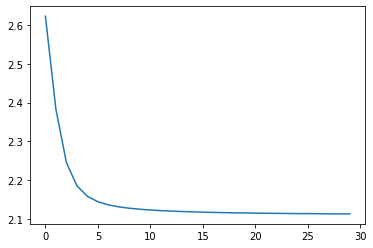

In [36]:
pyplot.plot(history.history['loss'])

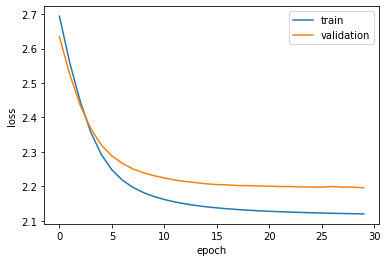

In [143]:
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

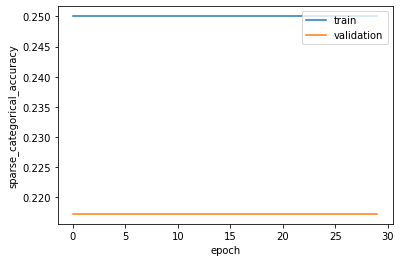

In [144]:
pyplot.plot(history.history['sparse_categorical_accuracy'])
pyplot.plot(history.history['val_sparse_categorical_accuracy'])
pyplot.ylabel('sparse_categorical_accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

In [9]:
history.history.predict(testx[:3])

AttributeError: 'dict' object has no attribute 'predict'